<a href="https://colab.research.google.com/github/nromano2/MLA_NVR/blob/main/MLA5_NVR/MLA5_NVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 5
## Nick Romano
## Machine Learning in the Cloud
## CS430 Fall 2024
---

## Library Imports

In [ ]:
#Mounting Google Drive to Connect to csv files
from google.colab import drive
drive.mount('/content/drive')

#Data Manipulation and Handling Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Modeling Libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Metrics Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Data

In [ ]:
landsat_train = pd.read_csv('/content/drive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/landsat_test.csv')
banknote = pd.read_csv('/content/drive/MyDrive/banknote_authentication.csv')

## Problem 1: RandomForestClassifier Landsat

### Statistics and Visual Exploration

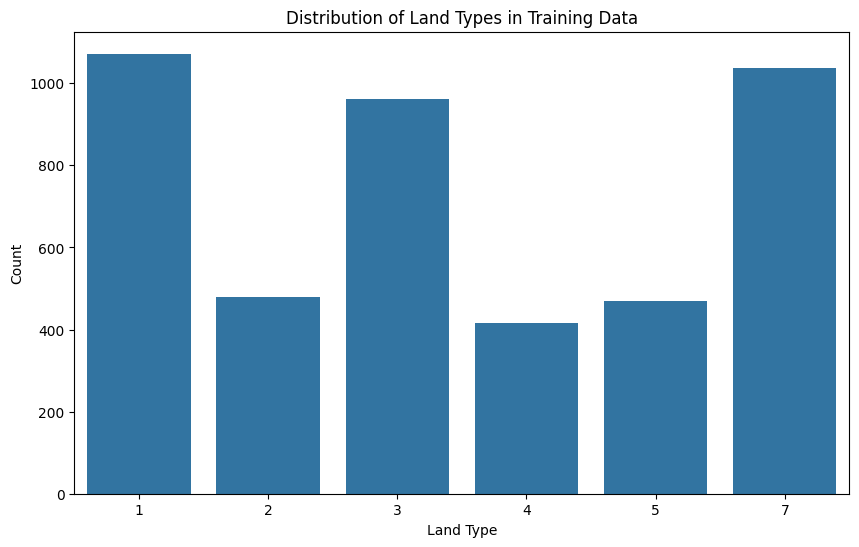

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Distribution of Land Types in Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

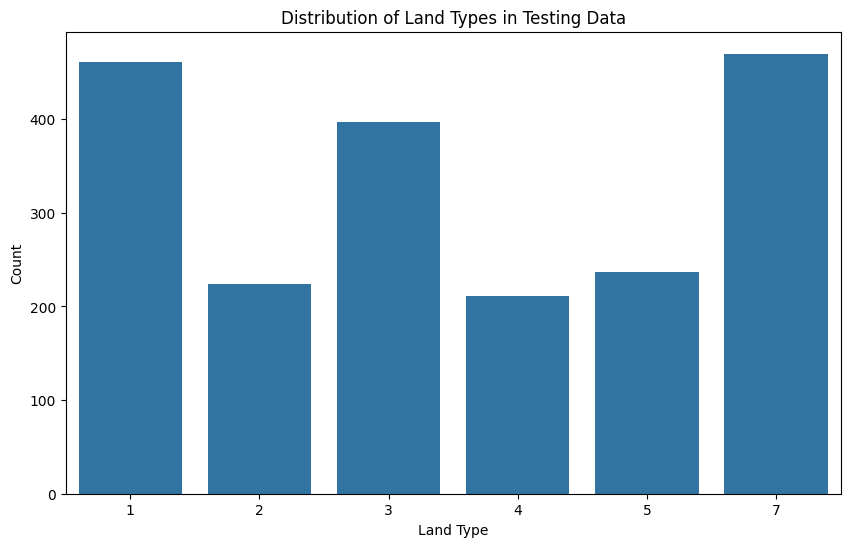

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Distribution of Land Types in Testing Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Train Test Split of Data

In [ ]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Column Transformer and Pipeline

In [ ]:
numerical_columns = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

### Executing of Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_l...
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating the Model

In [ ]:
#Making Predictions on Testing Data
y_pred = pipeline.predict(X_test)


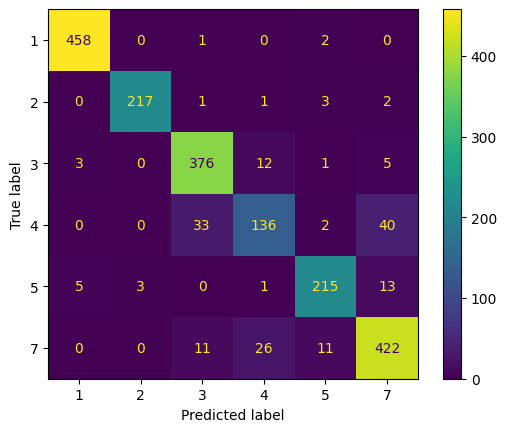

In [ ]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=pipeline.classes_).plot()

In [ ]:
#Model Metrics
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.9100260253371064
Recall: 0.912
F1 Score: 0.9101785248440142


In [ ]:
#Classification Report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



### Conclusion
Overall, the random forest classifier did well at predicting the different landtypes. This is reflected with the 91% accuracy score and the overall recall, precision, and f1 score being just above 91%. However, the random classifier had difficulty in predicting land type 4 which saw the larger incorrect prediction labels in the confusion matrix.

---
## Problem 2: Bagging Classifier Model

### Bagging Classifier Column Transformer and Pipeline

In [ ]:
numerical_columns = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2']

bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=10, random_state=42))
])

### Executing of Model

In [ ]:
bagging_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_l...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   random_state=42))])

### Evaluating the Model

In [ ]:
y_pred_bagging = bagging_pipeline.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy Score:", accuracy_bagging)

Bagging Classifier Accuracy Score: 0.882


---
## Problem 3: Banknore Random Forest 3

In [ ]:
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   forgery   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
banknote.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
forgery,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


### Statistical and Visualization Exploration

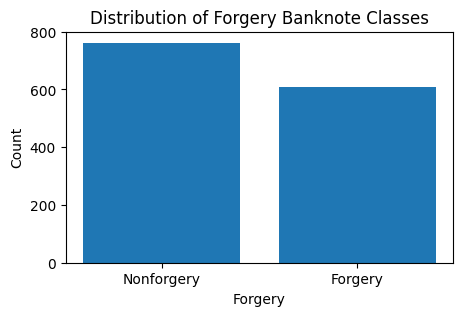

In [ ]:
#Forgery Counts
forgeryCounts = pd.DataFrame(banknote['forgery'].value_counts())
forgeryCounts.rename(index={0:'Nonforgery',
                      1:'Forgery'},
                     inplace=True)
forgeryCounts.reset_index(inplace=True)
forgeryCounts

#Forgery Count Distribution
plt.figure(figsize=(5, 3))
plt.bar(x=forgeryCounts['forgery'], height=forgeryCounts['count'])
plt.title('Distribution of Forgery Banknote Classes')
plt.xlabel('Forgery')
plt.ylabel('Count')
plt.show()


### Train Test Split of the Data

In [ ]:
X = banknote.drop('forgery', axis=1)
y = banknote['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating a Column Transformer and Pipeline

In [ ]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

### Executing Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

In [ ]:
#Making Predictions on Testing Data
y_pred = pipeline.predict(X_test)

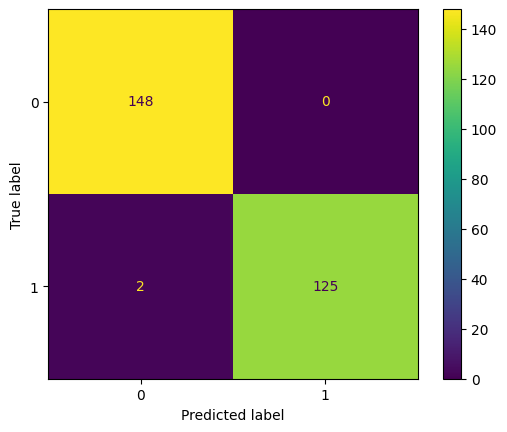

In [ ]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=pipeline.classes_).plot()

In [ ]:
#Model Metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 1.0
Recall: 0.984251968503937
F1 Score: 0.9920634920634921


In [ ]:
#Classification Report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

